In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('C:/1Learn/PW_DataScience/resource/diabetes.csv')

# Display basic statistics
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

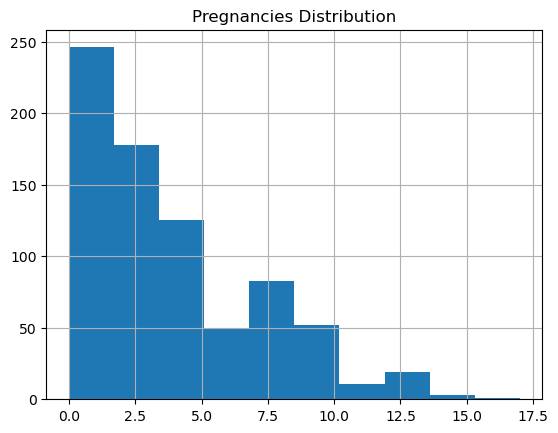

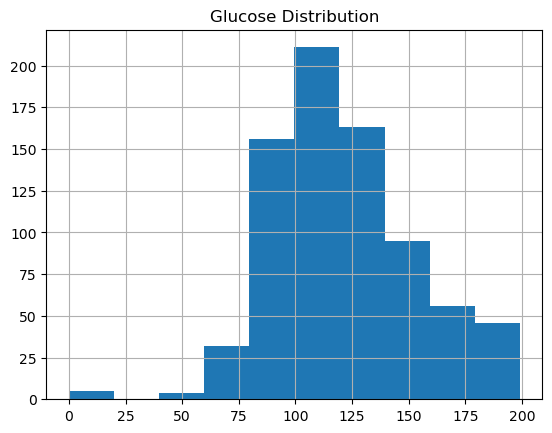

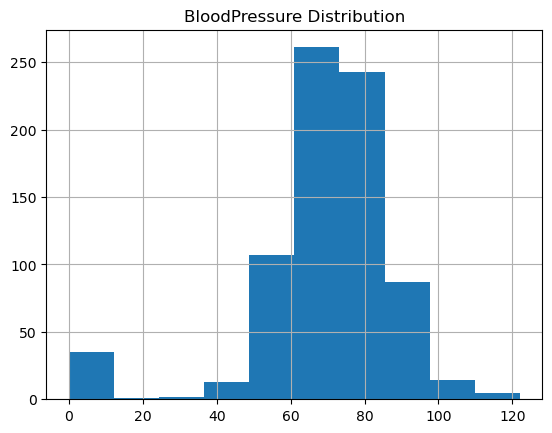

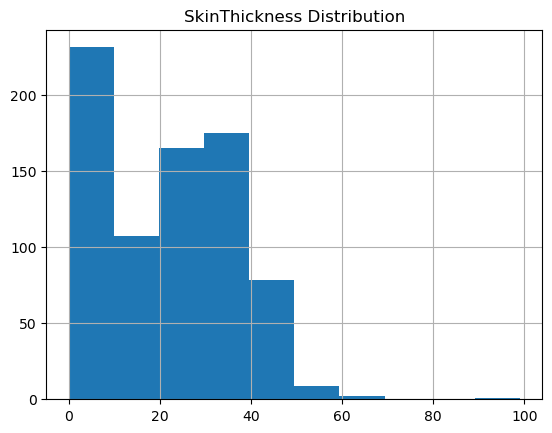

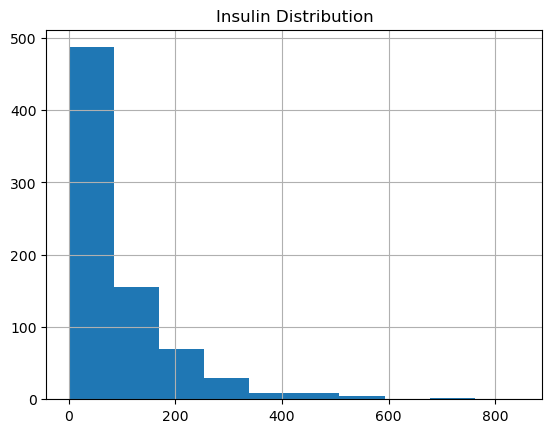

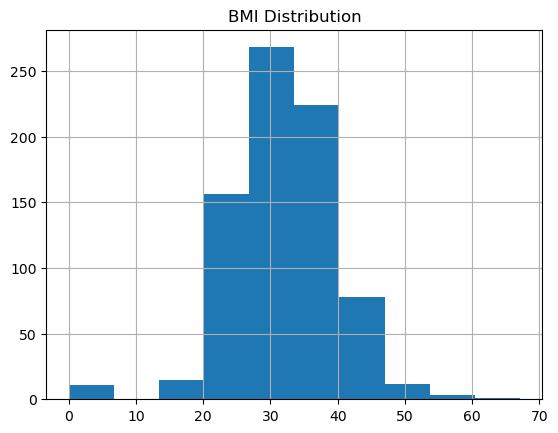

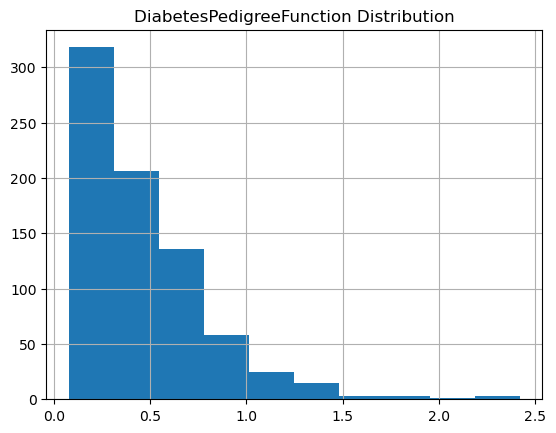

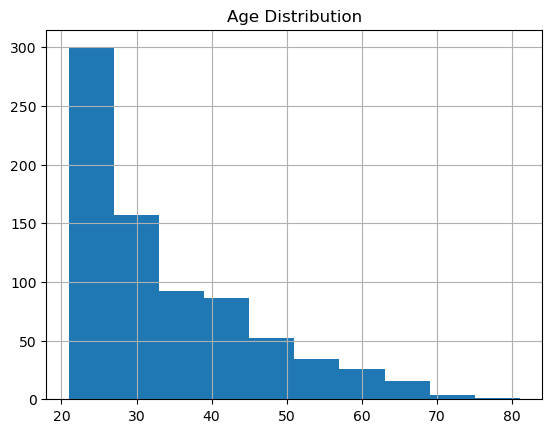

In [2]:
# Visualize the distribution of numerical variables
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in numerical_columns:
    data[column].hist()
    plt.title(column + ' Distribution')
    plt.show()

In [3]:
# Handling missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [5]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Train decision tree model with best hyperparameters
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

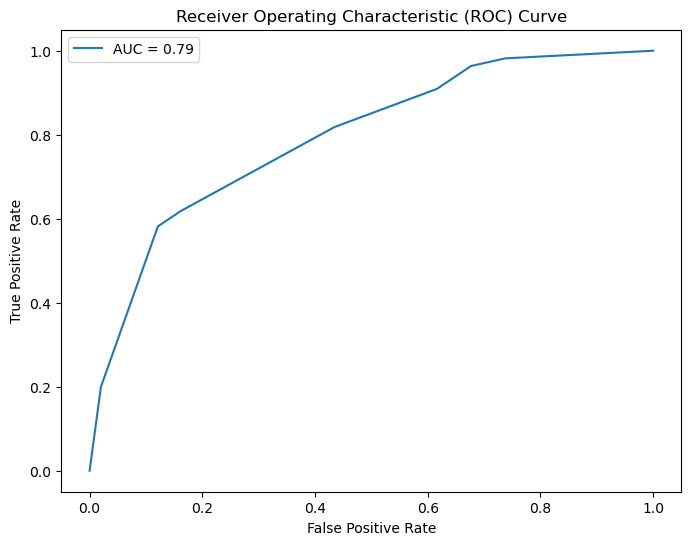

Accuracy: 0.76
Precision: 0.68
Recall: 0.62
F1 Score: 0.65
Confusion Matrix:
[[83 16]
 [21 34]]


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Predict on test set
y_pred = best_tree.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC
y_proba = best_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Visualizing results
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")


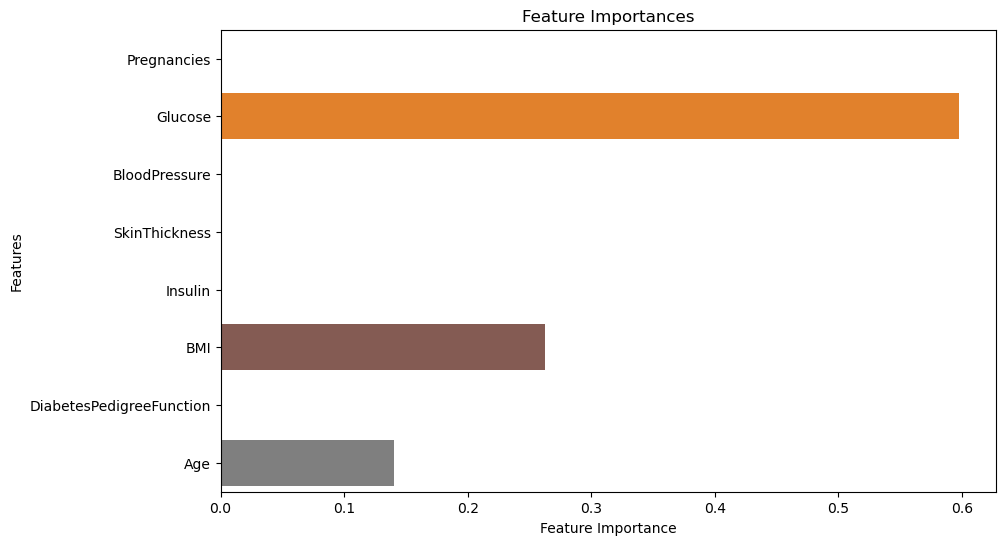

In [8]:
# Feature importances
feature_importances = best_tree.feature_importances_
important_features = dict(zip(X.columns, feature_importances))

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=list(important_features.values()), y=list(important_features.keys()))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


In [9]:
# 1. Sensitivity Analysis:

# Let's assume 'Glucose' is a crucial feature
# Store original test set for comparison

X_test_original = X_test.copy()

# Manipulate 'Glucose' feature within a range (e.g., increase/decrease by a certain percentage)

percentage_change = 0.1  # 10% change
X_test['Glucose'] = X_test_original['Glucose'] * (1 + percentage_change)

# Predict with the modified data
y_pred_sensitivity = best_tree.predict(X_test)


In [10]:
# Predict with the original test data
y_pred_original = best_tree.predict(X_test_original)

# Compare predictions between original and modified data
prediction_comparison = pd.DataFrame({
    'Original_Predictions': y_pred_original,
    'Modified_Predictions': y_pred_sensitivity
})

print(prediction_comparison)


     Original_Predictions  Modified_Predictions
0                       0                     0
1                       0                     0
2                       0                     0
3                       0                     0
4                       0                     1
..                    ...                   ...
149                     1                     1
150                     0                     0
151                     0                     0
152                     0                     1
153                     0                     0

[154 rows x 2 columns]


In [11]:
#Scenario Testing:

# Simulate a new patient scenario with extreme values
new_patient = pd.DataFrame({
    'Pregnancies': [10],
    'Glucose': [200],
    'BloodPressure': [70],
    'SkinThickness': [35],
    'Insulin': [150],
    'BMI': [40],
    'DiabetesPedigreeFunction': [1.0],
    'Age': [60]
})

# Predict outcome for the new patient
new_patient_pred = best_tree.predict(new_patient)


In [12]:
if new_patient_pred==0:
    print("non-diabetic")
else:
    print("diabetic")

diabetic
